# **Introduction**
Our project aims to determine the **best** neighborhood in Pittsburgh based on pedestrian safety during daily travel. We focused on this metric after exploring the Western Pennsylvania Regional Data Center (WPRDC), where we found relevant datasets to assess pedestrian safety. In brainstorming the project, we initially considered using “walkability” as our main metric, assessing areas with features like sidewalks, crosswalks, and an arbitrary dataset analyzing "walkscore". However, after further research, we realized that there were datasets that more accurately represented pedestrian safety statistics rather than general walkability. This led us to focus on identifying the neighborhood where pedestrians are least likely to encounter risks in their day-to-day travel.

---

## **Metric**
For our metric, we decided to base the best neighborhood on which is the safest for pedestrians.

### Sub-Metric: [Crosswalks](https://data.wprdc.org/dataset/city-of-pittsburgh-markings)
    Bestness will be based on:
        - The most crosswalks
        - People live there
        - The crosswalks are active


### Sub-Metric: [Speed Bumps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)
    Bestness will be based on:
        //TODO



### Sub-Metric: [Traffic Signs](https://data.wprdc.org/dataset/city-traffic-signs/resource/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c)
    Bestness will be based on:
        //TODO



---

## **The Best Neighbourhood**
Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.
// TODO

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Crosswalks

![](Images/Crosswalk.png)


In [8]:
walks = pd.read_csv("CSV-Files/Crosswalks.csv")

# Removes any inactive crosswalks using a mask
walksActive = walks[walks["inactive"] != "t"]

# Put the active crosswalks into a dataframe
crosswalkCounts = pd.DataFrame(walksActive['neighborhood'].value_counts().reset_index())

# Sort the dataframe in descending order
crosswalkCounts = crosswalkCounts.sort_values(by='count', ascending=False)

crosswalkCounts

,neighborhood,count
0,Central Business District,402
1,South Side Flats,262
2,Squirrel Hill South,239
3,Bloomfield,192
4,Shadyside,190
...,...,...
83,Fineview,3
84,Summer Hill,3
85,Chartiers City,1
86,St. Clair,1


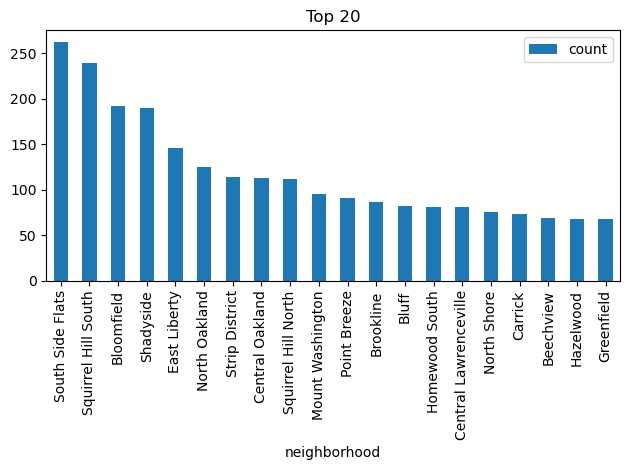

In [9]:
# Remove the Business District
crosswalkCounts = crosswalkCounts.iloc[1:]

# Take the top 20 for the data
crosswalkCounts = crosswalkCounts.head(20)

# Plot a bar graph for visual
crosswalkCounts.plot(kind="bar",x="neighborhood",y="count",title="Top 20")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Speed Bumps

![](Images/SpeedBumps.png)


In [16]:
speedHumps = pd.read_csv("CSV-Files/SpeedHumps.csv")
speedHumps.head()

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [26]:
newHumps = pd.DataFrame(speedHumps['neighborhood'].value_counts().reset_index())
newHumps = newHumps.rename(columns = {'neighborhood':'Neighborhoods','count':'Count'})
newHumps

,Neighborhoods,Count
0,Squirrel Hill South,18
1,Carrick,9
2,Polish Hill,6
3,North Oakland,6
4,Upper Hill,4
5,Brookline,4
6,Homewood South,4
7,South Side Slopes,4
8,Perry North,4
9,Garfield,3


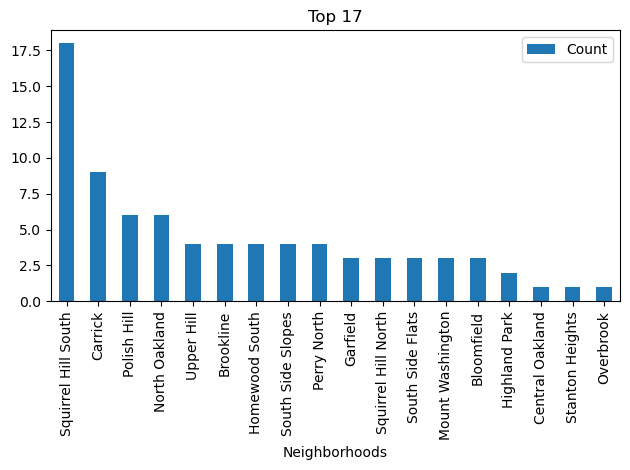

In [29]:
newHumps.plot(kind='bar',x='Neighborhoods',y='Count',title = 'Top 17')

plt.tight_layout()

## Traffic Signs

![](Images/TrafficSigns.png)


In [7]:
traffic_signs = pd.read_csv("CSV-Files/TrafficSigns.csv")
traffic_signs.head()

,_id,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,2,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,3,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,4,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,5,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671


In [10]:
traffic_sign_counts = pd.DataFrame(traffic_signs['neighborhood'].value_counts().reset_index())
traffic_sign_counts.columns = ['neighborhood', 'count']
traffic_sign_counts = traffic_sign_counts.sort_values(by='count', ascending=False)
traffic_sign_counts = traffic_sign_counts.head(20)
traffic_sign_counts

,neighborhood,count
0,South Side Flats,3672
1,Bloomfield,3627
2,Central Business District,3491
3,Shadyside,3370
4,Squirrel Hill South,3281
5,Brookline,2256
6,Carrick,2044
7,Central Lawrenceville,1970
8,Squirrel Hill North,1895
9,East Liberty,1759


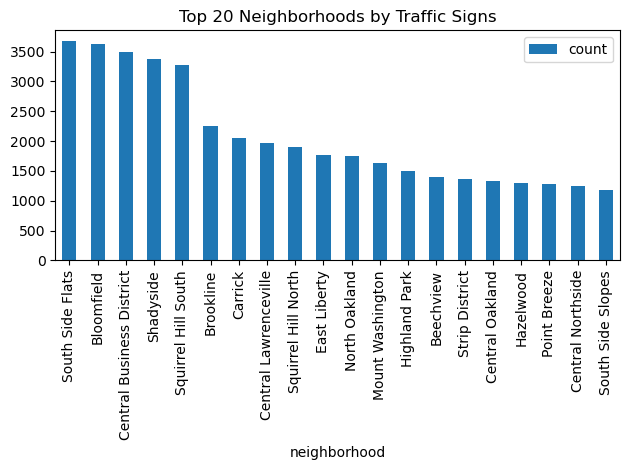

In [13]:
traffic_sign_counts.plot(kind="bar", x="neighborhood", y="count", title="Top 20 Neighborhoods by Traffic Signs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
## OVERALL ANALYSIS //TODOOOOOOOOOO

## **Conclusion**
Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.
**// TODO**

Ryan: //TODO

Ben: //TODO

Krish: //TODO